In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [5]:
# loading data
mnist = tf.keras.datasets.mnist

# splitting into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print("Shape of x_train: ", x_train.shape)

Shape of x_train:  (60000, 28, 28)


In [6]:
# building sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')                   
])

In [7]:
# compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
M = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test),
              epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2988 - accuracy: 0.9121 - val_loss: 0.1435 - val_accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1440 - accuracy: 0.9565 - val_loss: 0.1054 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 0.0762 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9792 - val_loss: 0.0698 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.0653 - val_accuracy:

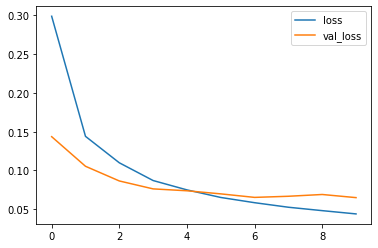

In [9]:
# plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(M.history['loss'], label = 'loss')
plt.plot(M.history['val_loss'], label = 'val_loss')
plt.legend()

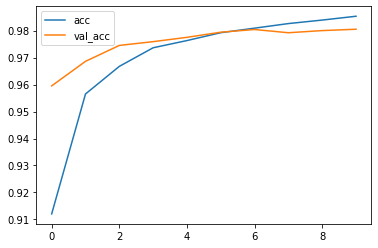

In [10]:
# Plot accuracy per iteration
plt.plot(M.history['accuracy'], label='acc')
plt.plot(M.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 971    0    1    0    0    1    3    1    3    0]
 [   0 1122    4    0    0    0    2    2    5    0]
 [   2    0 1014    3    1    0    3    5    4    0]
 [   0    0    5  993    0    3    0    4    3    2]
 [   0    0    4    0  961    1    3    2    0   11]
 [   2    0    0   13    1  867    3    1    4    1]
 [   5    2    0    1    3    2  944    0    1    0]
 [   2    3    8    2    0    0    0 1009    0    4]
 [   3    0    1   11    3    0    1    5  946    4]
 [   3    3    0    5   10    4    0    6    0  978]]


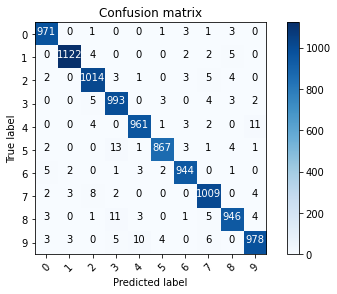

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

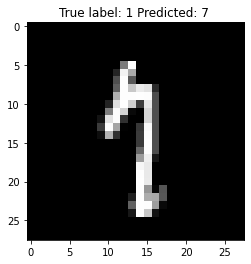

In [32]:
# show some misclassified examples

misclassified_image_index = (np.where(p_test != y_test))[0]
index = np.random.choice(misclassified_image_index)

plt.imshow(x_test[index], cmap='gray')
plt.title("True label: %s Predicted: %s " % (y_test[index], p_test[index]))
plt.show()